# Logistic Regression on Algerian forest fire datase

In [1]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skl
sns.set()

Collection of data

In [2]:
# lets read the data

data= pd.read_csv('algerian_clean.csv')
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,notfire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,notfire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,notfire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,notfire,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,notfire,0.0


In [5]:
data.describe().T # Basic stats

,count,mean,std,min,25%,50%,75%,max
day,244.0,15.754098,8.825059,1.0,8.000,16.00,23.000,31.0
month,244.0,7.500000,1.112961,6.0,7.000,7.50,8.000,9.0
year,244.0,2012.000000,0.000000,2012.0,2012.000,2012.00,2012.000,2012.0
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
DC,244.0,49.288484,47.619393,6.9,13.275,33.10,68.150,220.4


In [10]:
data.corr().T

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
day,1.000000e+00,2.232788e-17,NaN,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527930,0.177727,0.517229,0.350890,4.662229e-16
month,2.232788e-17,1.000000e+00,NaN,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127669,0.061680,0.085822,0.084181,-9.586232e-17
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,9.577222e-02,-5.901677e-02,NaN,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.558495,2.734961e-01
RH,-7.420934e-02,-3.788419e-02,NaN,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.570119,-4.064239e-01
Ws,4.700086e-02,-4.144673e-02,NaN,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.028850,-1.768290e-01
Rain,-1.122654e-01,3.532207e-02,NaN,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.322715,-4.108006e-02
FFMC,2.240321e-01,1.557668e-02,NaN,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.686111,2.246798e-01
DMC,4.915710e-01,6.817778e-02,NaN,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.874816,1.910937e-01
DC,5.279300e-01,1.276691e-01,NaN,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.740184,-8.148217e-02


In [15]:
# there is no null values
# i found that the year column not at corelate i will drop that column now


In [ ]:
data= data.drop('year',axis=1)

In [16]:
data.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,notfire,0.0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,notfire,0.0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,notfire,0.0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,notfire,0.0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,notfire,0.0


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

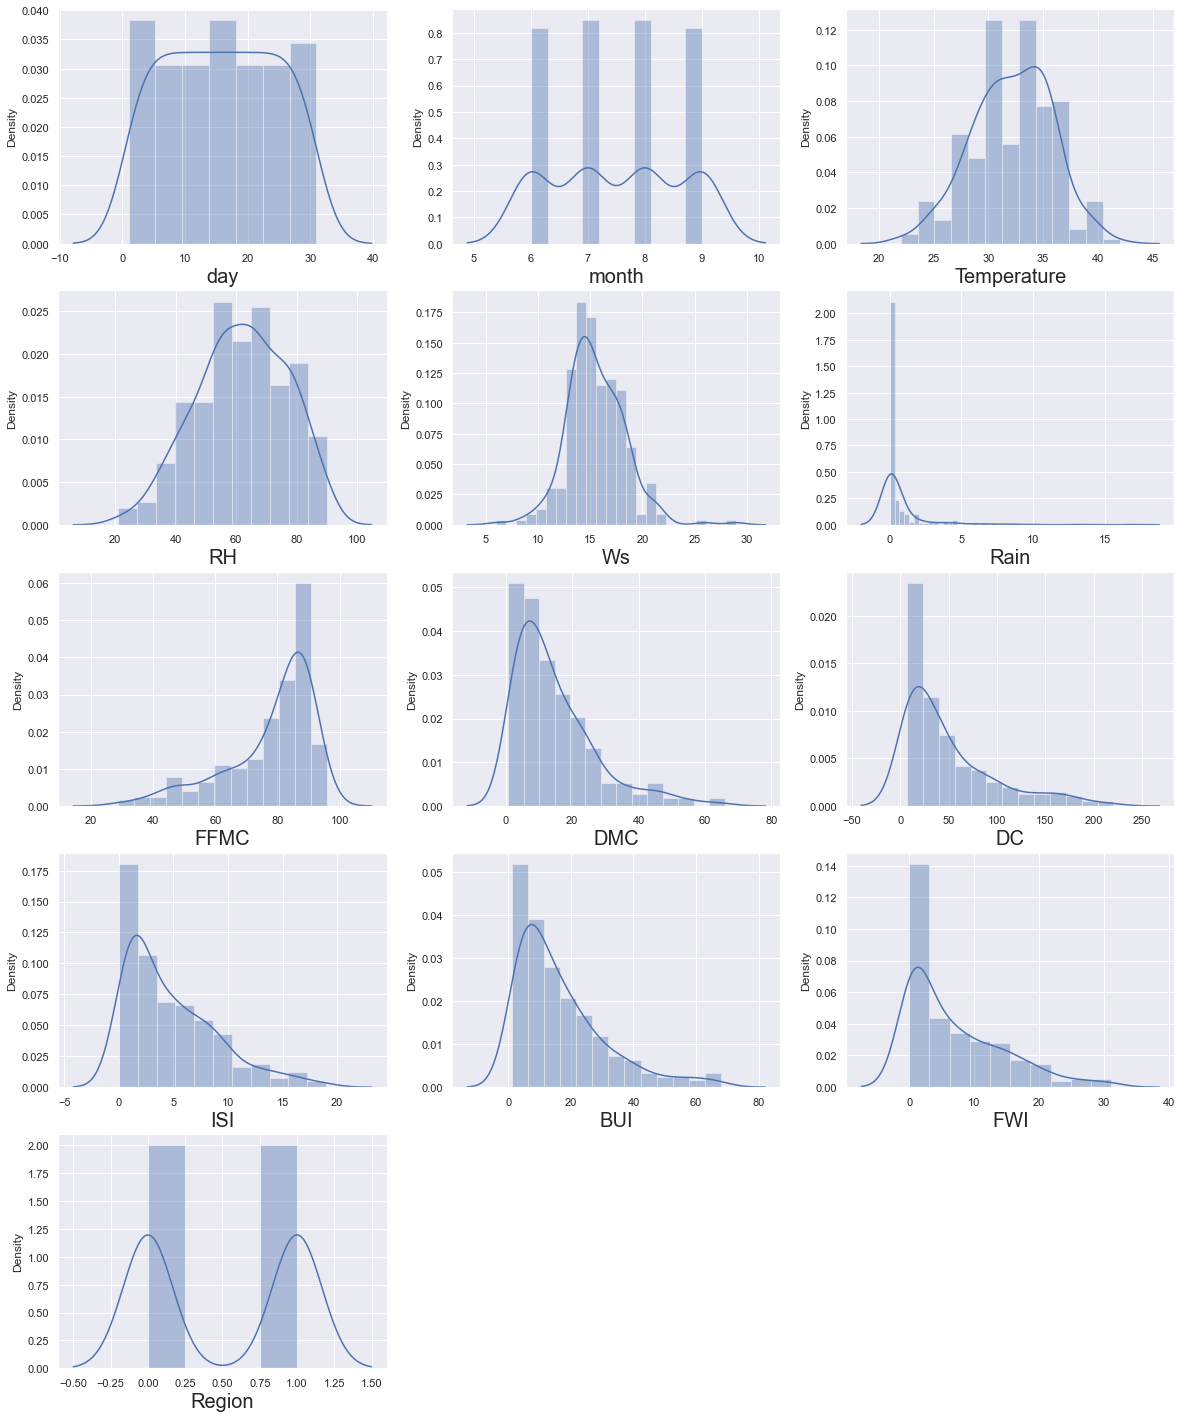

In [20]:
# lets see how the data is distrubuted for every columplt.figure(figsize=(20,25), facecolor='white')
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in ['day','month','Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI','Region']:
    
    if plotnumber<=14 :     # as there are 14 columns in the data
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
   
    plotnumber+=1
plt.show()

i can see from the graph there is skewness(right and left), and outliers

<AxesSubplot:>

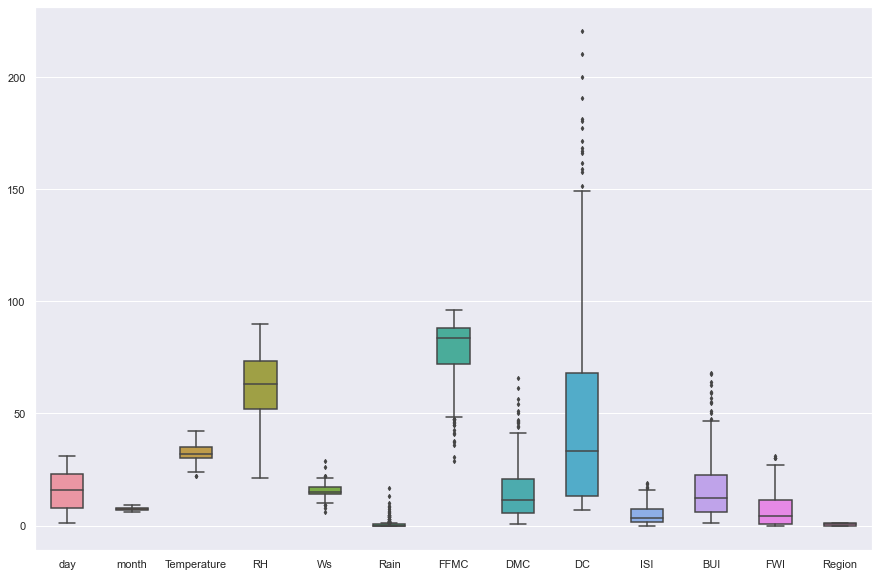

In [21]:
# left plot outliers with box plot
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

Before we fit our data to a model, let's visualize the relationship between our independent variables and the categories.

In [26]:
X= data.drop(columns=['Classes']) # independent features

y= data['Classes']   # categories column(dependent feature)

In [25]:
X.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0


In [27]:
y.head()  

0    notfire
1    notfire
2    notfire
3    notfire
4    notfire
Name: Classes, dtype: object

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\l

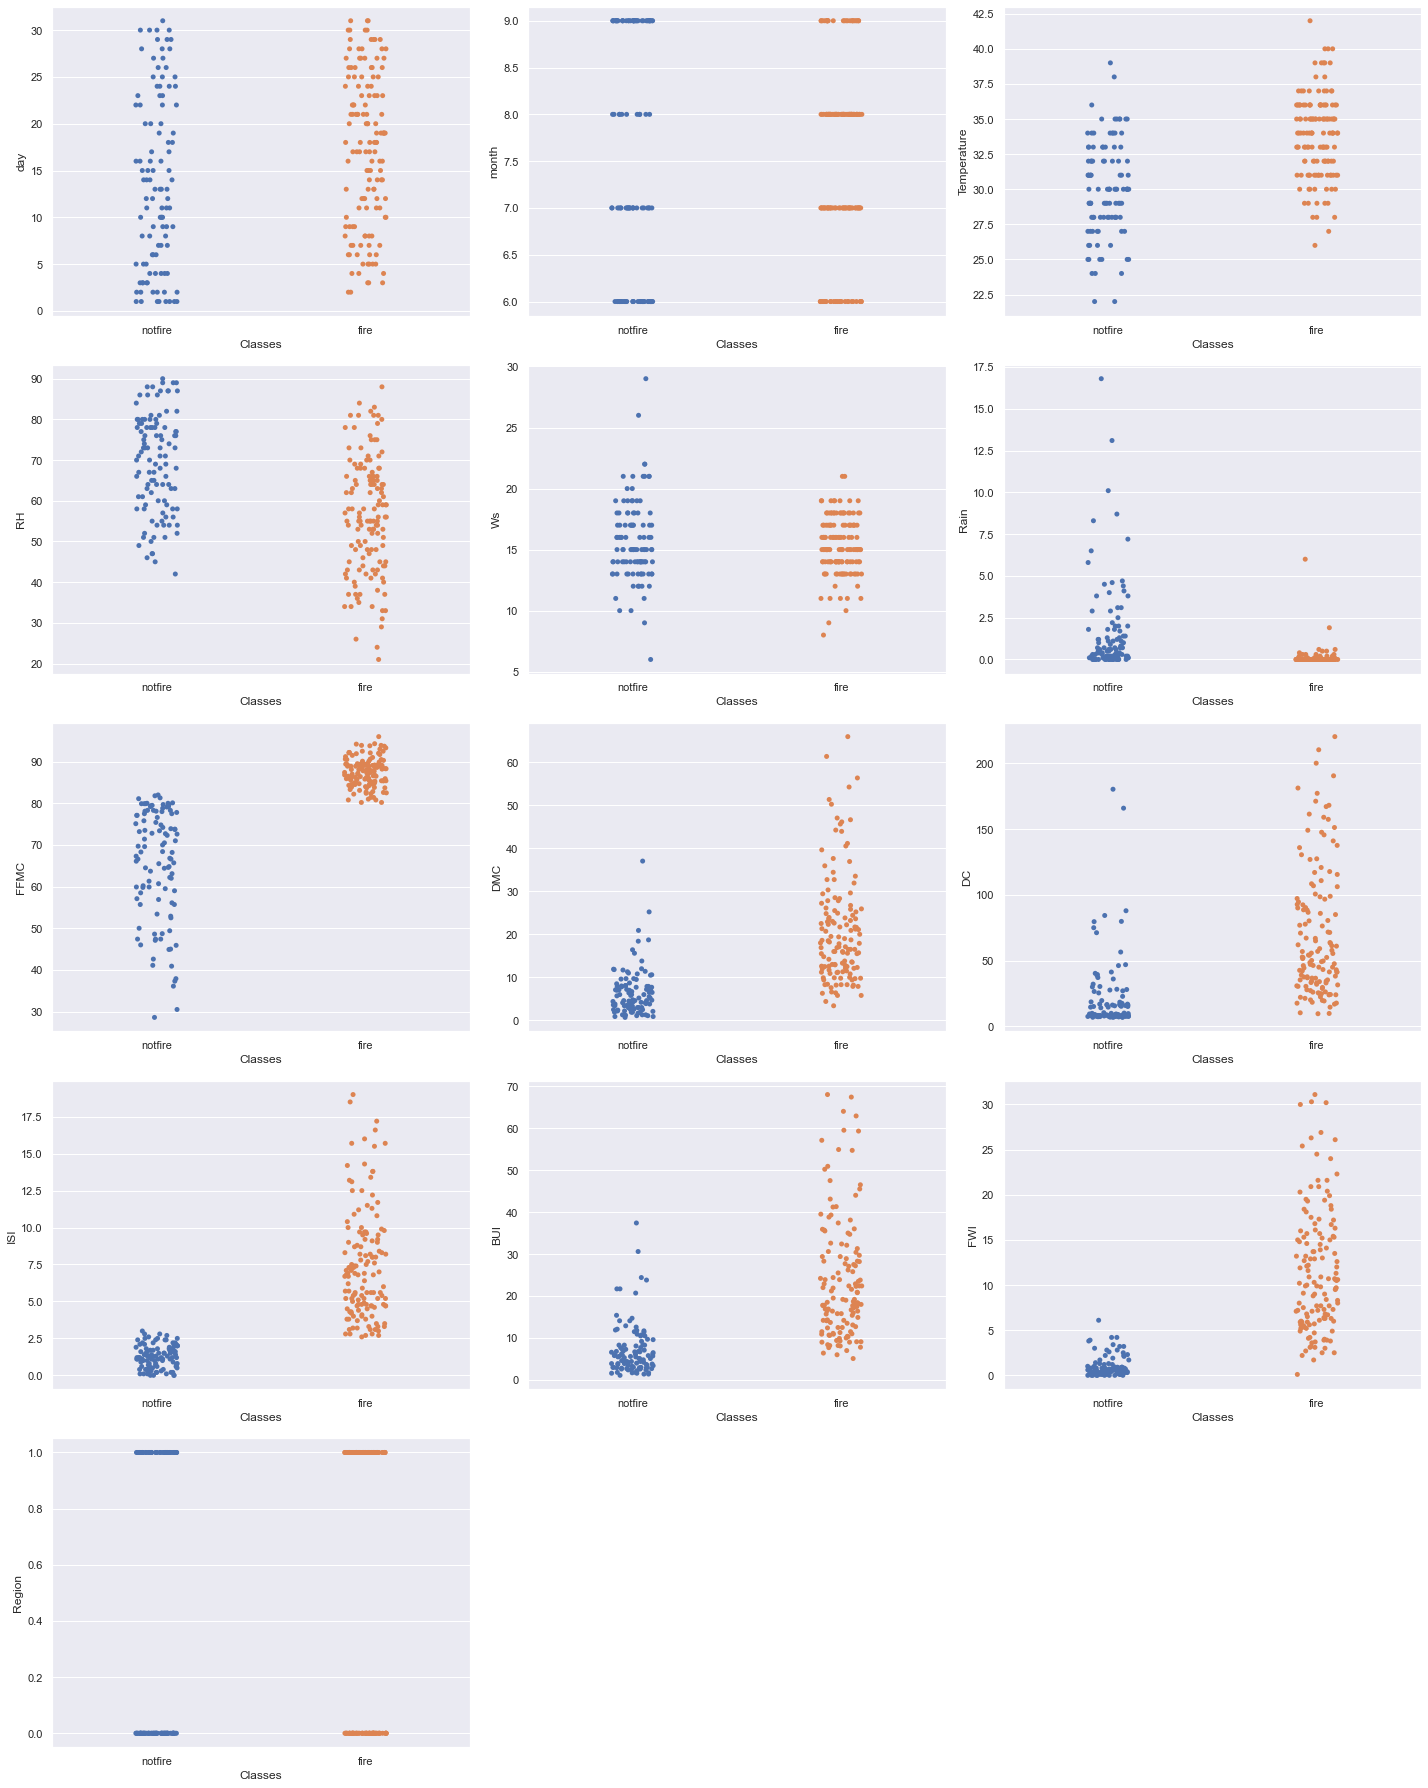

In [28]:
# let's see how data is distributed for every column

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=14 :
        ax = plt.subplot(5,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

Great!! Let's proceed by checking multicollinearity in the dependent variables. Before that, we should scale our data. Let's use the standard scaler for that.

In [29]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [30]:
X_scaled

array([[-1.67527776, -1.35052592, -0.87473544, ..., -0.93573985,
        -0.87656628, -1.        ],
       [-1.56173115, -1.35052592, -0.87473544, ..., -0.90046818,
        -0.89003748, -1.        ],
       [-1.44818455, -1.35052592, -1.70200461, ..., -0.98512017,
        -0.93045106, -1.        ],
       ...,
       [ 1.39048054,  1.35052592, -1.42624822, ..., -0.93573985,
        -0.91697987,  1.        ],
       [ 1.50402714,  1.35052592, -2.25351739, ..., -0.8158162 ,
        -0.84962389,  1.        ],
       [ 1.61757374,  1.35052592, -2.25351739, ..., -0.83697919,
        -0.87656628,  1.        ]])

In [31]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.483735,day
1,1.093774,month
2,2.434028,Temperature
3,2.895692,RH
4,1.314698,Ws
5,1.551808,Rain
6,3.930521,FFMC
7,83.456618,DMC
8,25.676487,DC
9,15.285113,ISI


from this 'BUI','FWI','ISI','DC','DMC' has a values more than 5 hence these are all having  multicollinearity 

<AxesSubplot:>

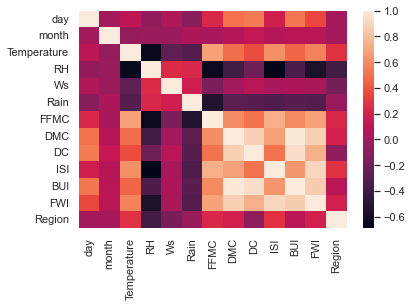

In [33]:
sns.heatmap(data.corr())

earity. Now, we can go ahead with fitting our data to the model. Before that, let's split our data in test and training set

In [34]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [35]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [48]:
import pickle
# Writing different model files to file
with open( 'algrianlogisticPridiction.pkl', 'wb') as f:
    pickle.dump(log_reg,f)
    
with open('algeriansandardScalar.pkl', 'wb') as f:
    pickle.dump(scalar,f)

    
# this will save our model into physical file

In [36]:
# Let's see how well our model performs on the test data set.


y_pred = log_reg.predict(x_test)

In [37]:
y_pred

array(['notfire', 'fire', 'notfire', 'notfire', 'notfire', 'fire', 'fire',
       'notfire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire',
       'notfire', 'fire', 'fire', 'fire', 'notfire', 'notfire', 'fire',
       'notfire', 'notfire', 'fire', 'notfire', 'notfire', 'fire',
       'notfire', 'fire', 'notfire', 'fire', 'notfire', 'notfire', 'fire',
       'notfire', 'fire', 'notfire', 'fire', 'notfire', 'fire', 'fire',
       'notfire', 'fire', 'notfire', 'notfire', 'notfire', 'fire',
       'notfire', 'fire', 'fire', 'notfire', 'notfire', 'fire', 'fire',
       'fire', 'fire', 'notfire', 'fire', 'fire', 'notfire', 'fire'],
      dtype=object)

In [38]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9836065573770492

you can see above that i have got a accuracy, 0.9836 that means 98.36 % accuracy

In [39]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[33,  1],
       [ 0, 27]], dtype=int64)

In [41]:
true_positive = conf_mat[0][0]
true_positive

33

In [42]:
false_positive = conf_mat[0][1]
false_positive

1

In [44]:
false_negative = conf_mat[1][0]
false_negative

0

In [43]:
true_negative = conf_mat[1][1]
true_negative

27

In [45]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9836065573770492

In [46]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9705882352941176

In [47]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall



1.0

I am getting recall value as 1.0 since, A model that produces no false negatives has a recall of 1.0.